In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from subprocess import call
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/Problem1_Happiness_2020.csv")
df.head(10)

,Country Name,Regional Indicator,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,Finland,Europe,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Europe,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Europe,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Europe,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Europe,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218
5,Netherlands,Europe,7.4489,0.939139,72.300919,0.908548,0.207612,0.364717
6,Sweden,Europe,7.3535,0.926311,72.600769,0.939144,0.111615,0.250880
7,New Zealand,Oceania,7.2996,0.949119,73.202629,0.936217,0.191598,0.221139
8,Austria,Europe,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955
9,Luxembourg,Europe,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country Name                  153 non-null    object 
 1   Regional Indicator            153 non-null    object 
 2   Happiness Scores              153 non-null    float64
 3   Social Support                153 non-null    float64
 4   Healthy Life Expectancy       153 non-null    float64
 5   Freedom to Make Life Choices  153 non-null    float64
 6   Generosity                    153 non-null    float64
 7   Perceptions of Corruption     153 non-null    float64
dtypes: float64(6), object(2)
memory usage: 9.7+ KB


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum().sum()

0

In [ ]:
df.shape

(153, 8)

In [ ]:
df.describe()

,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.473249,0.808636,64.445650,0.783413,-0.014719,0.733179
std,1.112094,0.121546,7.057819,0.117595,0.151764,0.175276
min,2.566900,0.320000,45.200000,0.396573,-0.300907,0.109784
25%,4.720000,0.740000,58.961712,0.714839,-0.127015,0.682620
50%,5.515000,0.830000,66.305145,0.799805,-0.033665,0.783122
75%,6.228500,0.906747,69.289192,0.877709,0.085429,0.850000
max,7.808700,0.974670,76.804581,0.974998,0.560664,0.935585


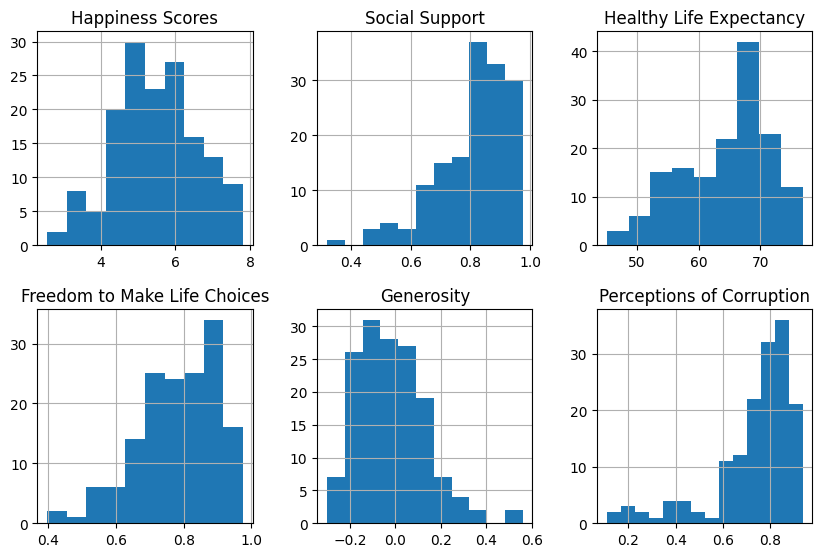

In [ ]:
df.hist(figsize=(10,10), bins='auto', layout=(3, 3), xlabelsize=10, ylabelsize=10)
plt.show()

In [ ]:
#EDA question
#1
df[["Country Name", "Happiness Scores"]].nlargest(10, "Happiness Scores").style.background_gradient(cmap="Greens")
#=> Finland is the country which the highest happiness score.

,Country Name,Happiness Scores
0,Finland,7.808700
1,Denmark,7.645600
2,Switzerland,7.559900
3,Iceland,7.504500
4,Norway,7.488000
5,Netherlands,7.448900
6,Sweden,7.353500
7,New Zealand,7.299600
8,Austria,7.294200
9,Luxembourg,7.237500


<Axes: xlabel='Regional Indicator', ylabel='Happiness Scores'>

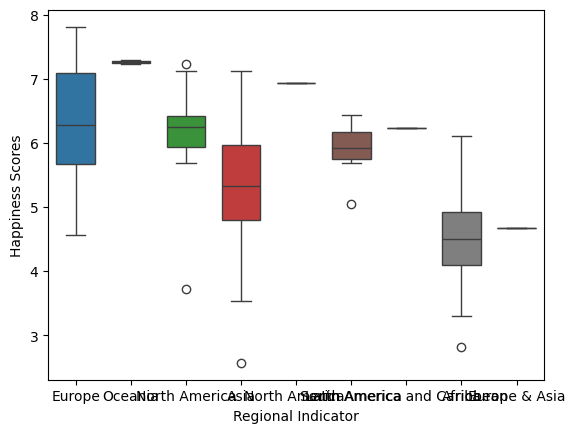

In [ ]:
#Happiness scores between regions
sns.boxplot(df, x="Regional Indicator", y="Happiness Scores", hue = "Regional Indicator", width = 0.7)


In [ ]:
#Correlations between happiness scores and others

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[float, int])

# Now apply the correlation function on the numeric columns and format precision
numeric_df.corr().style.background_gradient(cmap="YlOrRd").format(precision=2)



,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
Happiness Scores,1.00,0.77,0.77,0.59,0.07,-0.42
Social Support,0.77,1.00,0.74,0.48,-0.06,-0.21
Healthy Life Expectancy,0.77,0.74,1.00,0.45,-0.07,-0.35
Freedom to Make Life Choices,0.59,0.48,0.45,1.00,0.25,-0.42
Generosity,0.07,-0.06,-0.07,0.25,1.00,-0.28
Perceptions of Corruption,-0.42,-0.21,-0.35,-0.42,-0.28,1.00


Among all the above correlations, there is no signicant correlation between Happiness Scores and Generosity. However, Social Support, Healthy Life Expectancy, and Freedom to Make Life Choices exhibit a positive association with Happiness Scores. Conversely, Perceptions of Corruption demonstrate a negative relationship with Happiness Scores.

In [ ]:
y = df['Happiness Scores']
X = sm.add_constant(df.drop(['Happiness Scores','Country Name','Regional Indicator'],axis=1), prepend=False)

In [ ]:
# split data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# base model
mod = sm.OLS(y_train, sm.add_constant(X_train))  # Add constant for intercept
res = mod.fit()

In [ ]:
# Make predictions on the test set
y_pred = res.predict(sm.add_constant(X_test))

# Calculate R-squared (R2) and Mean Squared Error (MSE) on the test set
r2_base = r2_score(y_test, y_pred)
mse_base = mean_squared_error(y_test, y_pred)

print("R-squared (R2) on OLS model:", r2_base)
print("Mean Squared Error (MSE) on OLS:", mse_base)

R-squared (R2) on OLS model: 0.528138490172041
Mean Squared Error (MSE) on OLS: 0.37865015217084774


=> R2 on OLS model: 0.528: linear regression model explains about 52.8% of the variance in the happiness scores, maybe a moderate performance.
=> MSE on the OLS model: 0.3786: model's predictions are off by an average of about 0.38 square units.

In [ ]:
#Train with other models
#Lasso model
paramslasso = {'alpha':[0.001,0.01,0.1,1,10]}

lasso = Lasso(random_state=42)
CV_lasso = GridSearchCV(estimator=lasso, param_grid=paramslasso, cv=5,  n_jobs=5, verbose=1, scoring='r2')
CV_lasso.fit(X_train, y_train)

target_pred = CV_lasso.predict(X_test)
r2_score_lasso = r2_score(y_test, target_pred)
mse_lasso = mean_squared_error(y_test, target_pred)
print("R2 score in Lasso\t", r2_score_lasso)
print("MSE in Lasso\t", mse_lasso)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
R2 score in Lasso	 0.5239225291054774
MSE in Lasso	 0.38203329376250394


In [ ]:
# Decision Tree model
paramsdtr = {'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

dtr = DecisionTreeRegressor(random_state=42)
CV_dtr = GridSearchCV(estimator=dtr, param_grid=paramsdtr, cv=5,  n_jobs=5, verbose=1, scoring='r2')
CV_dtr.fit(X_train, y_train)

target_pred = CV_dtr.predict(X_test)
r2_score_dtr = r2_score(y_test, target_pred)
mse_dtr = mean_squared_error(y_test, target_pred)
print("R2 score in DCT\t", r2_score_dtr)
print("MSE in DCT\t", mse_dtr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2 score in DCT	 0.5106485121493368
MSE in DCT	 0.3926851660506116


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Random Forest model
paramsrfg = {'n_estimators': [10,20,30,40,50], 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]}

rfg = RandomForestRegressor(random_state=42)
CV_rfg = GridSearchCV(estimator=rfg, param_grid=paramsrfg, cv=5,  n_jobs=5, verbose=1, scoring='r2')
CV_rfg.fit(X_train, y_train)

target_pred = CV_rfg.predict(X_test)
r2_score_rfg = r2_score(y_test, target_pred)
mse_rfg = mean_squared_error(y_test, target_pred)
print("R2 score in RFG\t", r2_score_rfg)
print("MSE in RFG\t", mse_rfg)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
R2 score in RFG	 0.618364470759628
MSE in RFG	 0.3062473802395029


In [ ]:
# AdaBoostRegressor model
paramsabr = {'n_estimators': np.arange(10,51,10), 'learning_rate': np.arange(0.5, 1.0, 0.1)}

abr = AdaBoostRegressor(random_state=42)
CV_abr = GridSearchCV(estimator=abr, param_grid=paramsabr, cv=5,  n_jobs=5, verbose=1, scoring='r2')
CV_abr.fit(X_train, y_train)

target_pred = CV_abr.predict(X_test)
r2_score_abr = r2_score(y_test, target_pred)
mse_abr = mean_squared_error(y_test, target_pred)
print("R2 score in ABR\t", r2_score_abr)
print("MSE in ABR\t", mse_abr)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
R2 score in ABR	 0.6653797870937406
MSE in ABR	 0.2685194530543357


In [ ]:
# Results in training model in AdaBoostRegressor model
# AdaBoostRegressor model
paramsabr = {'n_estimators': np.arange(10,51,10), 'learning_rate': np.arange(0.5, 1.0, 0.1)}

abr = AdaBoostRegressor(random_state=42)
CV_abr = GridSearchCV(estimator=abr, param_grid=paramsabr, cv=10,  n_jobs=10, verbose=1, scoring='r2')
CV_abr.fit(X_train, y_train)

target_pred = CV_abr.predict(X_train)
print("R2 score in ABR\t", r2_score(y_train, target_pred))
print("MSE in ABR\t", mean_squared_error(y_train, target_pred))

Fitting 10 folds for each of 25 candidates, totalling 250 fits
R2 score in ABR	 0.8673440167829158
MSE in ABR	 0.17591327386038166


In [ ]:
# Random XGBoost model
paramsgbr = {'n_estimators': np.arange(10,51,10), 'learning_rate': np.arange(0.5, 1.0, 0.1)}

gbr = GradientBoostingRegressor(random_state=42)
CV_gbr = GridSearchCV(estimator=gbr, param_grid=paramsgbr, cv=10,  n_jobs=5, verbose=1, scoring='r2')
CV_gbr.fit(X_train, y_train)

target_pred = CV_gbr.predict(X_test)
r2_score_GBR = r2_score(y_test, target_pred)
mse_GBR = mean_squared_error(y_test, target_pred)
print("R2 score in GBR\t", r2_score_GBR)
print("MSE in GBR\t", mse_GBR)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
R2 score in GBR	 0.5496477908831144
MSE in GBR	 0.36138979120115144


In [ ]:
# Results in training model in XGBoost model
# Random XGBoost model
paramsgbr = {'n_estimators': np.arange(10,51,10), 'learning_rate': np.arange(0.5, 1.0, 0.1)}

gbr = GradientBoostingRegressor(random_state=42)
CV_gbr = GridSearchCV(estimator=gbr, param_grid=paramsgbr, cv=5,  n_jobs=5, verbose=1, scoring='r2')
CV_gbr.fit(X_train, y_train)

target_pred = CV_gbr.predict(X_train)
r2_score_GBR_train = r2_score(y_train, target_pred)
mse_GBR_train = mean_squared_error(y_train, target_pred)
print("R2 score in GBR\t", r2_score_GBR_train)
print("MSE in GBR\t", mse_GBR_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
R2 score in GBR	 0.9671090698288979
MSE in GBR	 0.043616209886616165


In [ ]:
cv_name = ['res', 'CV_lasso', 'CV_dtr', 'CV_rfg', 'CV_abr', 'CV_gbr']
r2 = []
mse = []

for cv in cv_name:
  model = globals()[cv]
  if cv == 'res':
    target_pred = model.predict(sm.add_constant(X_test))
  else:
    target_pred = model.predict(X_test)

  r2.append(r2_score(y_test, target_pred))
  mse.append(mean_squared_error(y_test, target_pred))

KeyError: 'res'

In [ ]:
r2 = [r2_base, r2_score_lasso, r2_score_dtr, r2_score_rfg, r2_score_abr, r2_score_GBR]
mse = [mse_base, mse_lasso, mse_dtr, mse_rfg, mse_abr, mse_GBR]

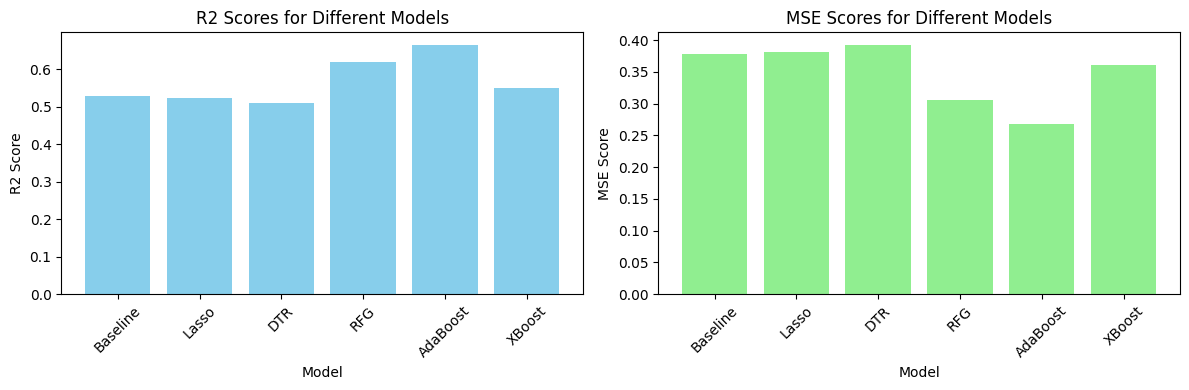

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with 1 row and 2 columns

# Plot the first chart (R2 scores)
axs[0].bar(['Baseline', 'Lasso', 'DTR' ,'RFG', 'AdaBoost', 'XBoost'], r2, color='skyblue')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('R2 Score')
axs[0].set_title('R2 Scores for Different Models')
axs[0].tick_params(axis='x', rotation=45)

# Plot the second chart (MSE scores)
axs[1].bar(['Baseline', 'Lasso', 'DTR' ,'RFG', 'AdaBoost', 'XBoost'], mse, color='lightgreen')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('MSE Score')
axs[1].set_title('MSE Scores for Different Models')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()